### Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy
import xarray as xr
import h5py 
import random


### Define Plotting Methods

In [2]:
def addSubplot(data, variable = None, lons = None, lats = None, time = 0, index = 0, size_x = 1, size_y = 1):
	if lons is None or lats is None:
		try:
			lons = data.variables['lon']
			lats = data.variables['lat']
		except Exception:
			print("Longitude/Lattide variables not found!")
			return
	extent = [lons.min(), lons.max(), lats.min(), lats.max()]
	ax = plt.subplot(size_x,size_y,index, projection=ccrs.PlateCarree())
	ax.set_extent(extent, crs=ccrs.PlateCarree())
	ax.coastlines(resolution='50m')
	ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
	ax.add_feature(cartopy.feature.RIVERS)	
	if variable == None:
		ax.contourf(lons, lats, data ,cmap = "jet")
	else:
		ax.contourf(lons, lats, data[variable][time],cmap = "jet")

        
        
def plotData(data, lons, lats):
	plt.figure(figsize=(12, 4))
	extent = [lons.min(), lons.max(), lats.min(), lats.max()]
	ax = plt.axes(projection=ccrs.PlateCarree())
	ax.set_extent(extent)
	ax.gridlines()
	ax.coastlines(resolution='50m')
	ax.add_feature(cartopy.feature.OCEAN)
	ax.add_feature(cartopy.feature.LAND, edgecolor='black')
	ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
	ax.add_feature(cartopy.feature.RIVERS)	
	ax.contourf(lons, lats, data, cmap = "jet")
	plt.show()

### Read Data

In [26]:
data_directory = "../data/"
filename_labels = "nwcsaf_msevi-nawdex-20160925.nc"
filename_data = "msevi-nawdex-20160925.nc"
filename_mask = "region_masks_for_msevi_nawdex.h5"

sat_data = xr.open_dataset(data_directory+filename_data)
label_data = xr.open_dataset(data_directory+filename_labels)
mask_data = h5py.File(data_directory+filename_mask, 'r')

lons = sat_data['lon']
lats = sat_data['lat']




### Plot a number of Maps from the Data

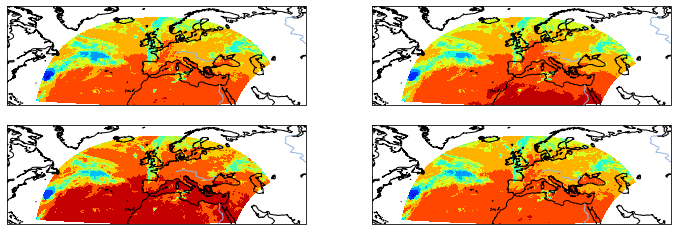

In [27]:

fig = plt.subplots(2, 2, figsize=(12, 4))
i=0
for variable in sat_data.variables:
    # check if variable is of right type, plot first few
	if "bt" in variable:
		i = i+1
		if i > 4:
			break
		addSubplot(sat_data, variable, index = i, size_x = 2, size_y = 2)
#addPlotToSubplot(label_data, "CT", index = 4)
plt.show()


### Convert mask to xr-Dataset

In [30]:
dims = ['rows', 'cols']
coords = {'lat': sat_data.coords['lat'], 'lon':sat_data.coords['lon']}

mask_ds = xr.Dataset()
for key in mask_data.keys():
	if key == "_source":
		continue
	m = xr.DataArray([row for row in mask_data[key]], dims = dims, coords = coords, name = key + "_mask")
	mask_ds[key + "_mask"] = m

    
mask_ds

<xarray.Dataset>
Dimensions:                  (cols: 2776, rows: 1004)
Coordinates:
    lat                      (rows, cols) float32 nan nan nan ... 21.7 21.7
    lon                      (rows, cols) float32 nan nan nan ... 39.34 39.39
Dimensions without coordinates: cols, rows
Data variables:
    atlantic_mask            (rows, cols) bool False False False ... False False
    atlantic_too_large_mask  (rows, cols) bool False False False ... False False
    black_sea_mask           (rows, cols) bool False False False ... False False
    europe_mask              (rows, cols) bool False False False ... False False
    full_region_mask         (rows, cols) bool False False False ... False False
    mediterranean_mask       (rows, cols) bool False False False ... False False
    northern_africa_mask     (rows, cols) bool False False False ... False False

### test stuff and such

In [6]:

mask_data = h5py.File(data_directory+filename_mask, 'r')
print(mask_data.keys())

atlantic_mask = mask_data['atlantic']
atlantic_mask = xr.DataArray([row for row in atlantic_mask], dims= ("rows", "cols"), name = "mask")

mediterranean_mask = mask_data['mediterranean']
mediterranean_mask = xr.DataArray([row for row in mediterranean_mask], dims= ("rows", "cols"), name = "mask")

masked_lons = xr.DataArray(lons).where(mediterranean_mask)
masked_lats = xr.DataArray(lats).where(mediterranean_mask)

<KeysViewHDF5 ['_source', 'atlantic', 'atlantic_too_large', 'black_sea', 'europe', 'full_region', 'mediterranean', 'northern_africa']>


In [9]:
dims = ['rows', 'cols']
coords = {'lat': sat_data.coords['lat'], 'lon':sat_data.coords['lon']}

mask_ds = xr.Dataset()
for key in mask_data.keys():
	if key == "_source":
		continue
	m = xr.DataArray([row for row in mask_data[key]], dims = dims, coords = coords, name = key + "_mask")
	mask_ds[key + "_mask"] = m

KeysView(<xarray.Dataset>
Dimensions:  ()
Data variables:
    _source  <U84 '/vols/talos/home/fabian/proj/2017-07_icon-nawdex/nbooks/06...)


In [ ]:
masked_data_point = xr.DataArray(sat_data['bt120'][0])
masked_data_point = masked_data_point.where(mediterranean_mask)


plotData(masked_data_point, masked_lons, masked_lats)
plt.show()






In [ ]:
masked_label = xr.DataArray(label_data['CT'][0])
masked_label = masked_label.where(mediterranean_mask)

plotData(masked_label, masked_lons, masked_lats)
plt.show()
